# Question 1

## **Dynamique du système**

On suppose que les proies se reproduisent de manière exponentielle et que la diminution de leur population est liée aux recontres avec les prédateurs.
On suppose également que les prédateurs ont une mortalité exponentielle. La population des prédateurs augmente lorsqu'ils rencontrent des proies.

|$\dot{x_1} =$|$\alpha x_1$|$-\beta x_1 x_2$|
|:--------------:|:------------------:|:---------------------------:|
|évolution proies| naissance naturelle proies|rencontre proies prédateurs|
</br>

|$\dot{x_2} =$|$-\gamma x_2$|$+\delta x_1 x_2$|
|:------------------:|:-------------------------------:|:-----------:|
|évolution prédateurs|mortalité naturelle prédateurs|rencontre proie prédateurs|
</br>

## **Points d'équilibre**

Nous cherchons maintenant les points d'équilibre du système. $x$ est un point d'équilibre si et seulement $\dot{x} = 0$

$\Leftrightarrow
\begin{pmatrix}
x_1 = 0 & ou & \alpha = \beta x_2 \\
x_2 = 0 & ou & \gamma = \delta x_1
\end{pmatrix}$

$\Leftrightarrow
x = 0 \;$ ou $\; \bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$

En effet, si $x_1 = 0\,$, alors $x_2 = 0$ nécessairement car il n'est pas possible que $x_1 = \frac{\gamma}{\delta} > 0$

Nous ne pouvons pour le moment rien dire sur leur stabilité, nous ne savons pas si les solutions initialisées proches de ces points restent proches en temps long.

# Question 2

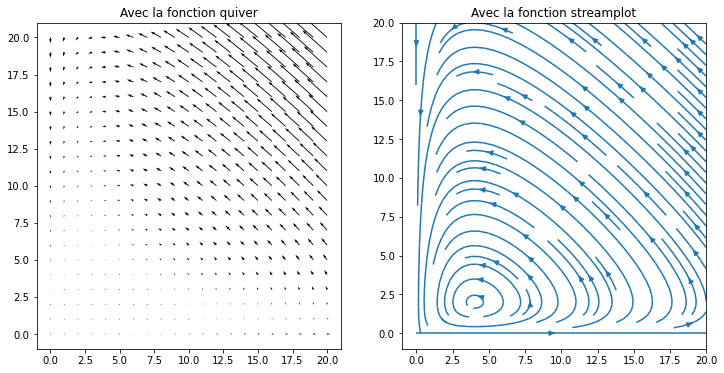

In [16]:
#Affiche un champ de dérivées de positions avec quiver ou streamplot

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

x1 = np.linspace(0,20,21)
x2 = np.linspace(0,20,21)
X1, X2 = np.meshgrid(x1, x2) #Champ des positions

def F(X1, X2):
    #Fonction qui retourne la dérivée de la position pour Lotka - Volterra
    alpha = 2
    beta = 1
    gamma = 4
    delta = 1
    return X1*(alpha - beta*X2), -X2*(gamma - delta*X1)

U, V = F(X1, X2) #champ des dérivées

fig = plt.figure(figsize = (12,6))

ax1 = plt.subplot(121)
ax1.quiver(X1, X2, U, V)
plt.title("Avec la fonction quiver")

ax2 = plt.subplot(122)
ax2.streamplot(X1, X2, U, V, density=1)
plt.title("Avec la fonction streamplot")

plt.show()

Nous remarquons grâce aux deux graphes de portrait de phase que les solutions sont bornées, avec les populations de proies et de prédateurs ( sardines et requins par exemple) qui oscillent. Lorsqu'il y a beaucoup de sardines, la population de requins augmentent et celle de sardines diminue par exemple. On peut imaginer que ces oscillations sont périodiques.

# Question 3

Les équations de Lotka-Volterra peuvent se réécrire : $\dot{x} = f(x)$

avec
$f :
\begin{matrix}
\mathbb{R}_{>0}\times \mathbb{R}_{>0} \rightarrow \mathbb{R}\times \mathbb{R} \\
\;\;\;\;\;(x_1, x_2) \rightarrow
\begin{pmatrix}
\alpha x_1 - \beta  x_1 x_2\\
-\gamma x_2 + \delta x_1 x_2
\end{pmatrix}
\end{matrix}
$
est continue

et comme

$(t,x) \rightarrow \partial_xf(t, x) =
\begin{pmatrix}
 \alpha - \beta x_2 & -\beta x_1 \\
 \delta x_2 & -\gamma + \delta x_1
\end{pmatrix}$ existe et est continue sur $\mathbb{R} \times \mathbb{R_{>0}^2}$ alors f est continuement différentiable par rapport à $x$.

Par le théorème de Cauchy-Lipschitz, pour tout $x_0 \in \mathbb{R_{>0}^2}$, il existe une solution maximale unique $x : I \rightarrow \mathbb{R^2}$ dans $S_f(x_0)$.

Si $x_1(t_0) = 0$ et $x_2(t_0) > 0$, alors par le théorème de Cauchy-Lipschitz,

$
\left\{\begin{matrix}
x_1(t) = x_1(t_0) = 0 \;\;\;\;\;\;\;\;\;\\
x_2(t) = x_2(t_0) * e^{-\gamma(t-t_0)}
\end{matrix}\right.
\;\;$
est l'unique solution passant par $(0, x_2(t_0))$.

De même, si $x_1(t_0) > 0$ et $x_2(t_0) = 0$,

$
\left\{\begin{matrix}
x_1(t) = x_1(t_0) * e^{\alpha(t-t_0)}\\
x_2(t) = x_2(t_0) = 0 \;\;\;\;\;\;\;\;\;
\end{matrix}\right.
\;\;$
est l'unique solution passant par $(x_1(t_0), 0)$.

Ainsi, si
$
\left\{\begin{matrix}
x_1(t_0) > 0\\
x_2(t_0) > 0
\end{matrix}\right.
\;\;$
alors
$
\left\{\begin{matrix}
x_1(t) > 0\\
x_2(t) > 0
\end{matrix}\right.
\;\forall t\;$

En effet, si $\exists \tau, \;x_1(\tau) = 0$, alors $\forall t,\, x_1(t) = 0$, notamment pour $t=t_0$, ce qui est absurde car $x_1(t_0) > 0$. De même par rapport à $x_2$. De plus, il ne peut pas exister de $t$ tel que $x_1(t) <0$ car on se retrouverait dans le cas précédent par théorème des valeurs intermédiaires.


# Question 4

Grâce au théorème de Cauchy-Lipschitz, nous avons qu'il existe une unique solution mamximale locale (défini sur un intervalle de temps fini) pour toutes conditions initiales dans $\mathbb{R_{>0}^2}$. Nous cherchons maintenant à prolonger ces solutions dans $\mathbb{R}$ tout entier.

Nous commencons par calculer la dérivée de $H(x1, x2) = \delta x1 \hspace{1mm} \textrm{-} \hspace{1mm} \gamma ln(x1) + \beta x2 \hspace{1mm} \textrm{-} \hspace{1mm} \alpha ln(x2)$ :

$\frac{d}{dt}(H(x_1, x_2)) = < \nabla H(x_1, x_2), f(x_1, x_2)>$

Donc
$\begin{matrix}
    &   \begin{pmatrix}
        \alpha x_1 - \beta  x_1 x_2\\
        -\gamma x_2 + \delta x_1 x_2
        \end{pmatrix}   \\
\frac{d}{dt}(H(x_1, x_2)) =
\begin{pmatrix}
\delta - \frac{\gamma}{x_1} & \beta - \frac{\alpha}{x_2}\\
\end{pmatrix}
    &   \begin{pmatrix}
        \;\;\;0\;\;\;\\
        \end{pmatrix}
\end{matrix}$

Ainsi $H$ est une constante : $H(x_1, x_2) = H_0$. Nous pouvons ainsi montrer que $f(x_1, x_2)$ est bornée.

En effet, $\exists A, B> 0,\; \forall x_1>A, \forall x_2>B,$
$
\left\{\begin{matrix}
\gamma*ln(x_1) < \frac{\delta x_1}{2}\\
\alpha*ln(x_2) < \frac{\beta x_2}{2}
\end{matrix}\right.
$

Ainsi, si $(x_1, x_2)\notin[-A, A]\times[-B, B]$, $ H_0 > \frac{1}{2}*(\delta x_1 +\beta x_2)$

donc $(x_1(t), x_2(t))$ est bornée. En appliquant la réciproque du théorème du domaine maximal d'existence, on prouve alors que toute solution maximale est définie sur $\mathbb{R}$ tout entier.


# Question 5

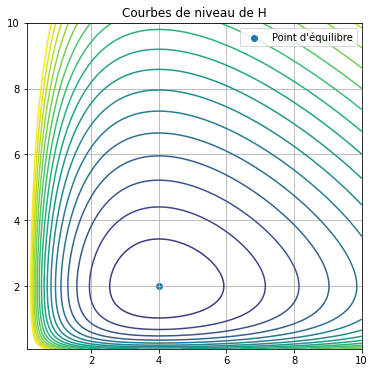

In [2]:
#Question 5
import numpy as np
import matplotlib.pyplot as plt
delta = 1
gamma = 4
beta = 1
alpha = 2

def H(x1, x2):
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

x1 = np.linspace(0.1,10,1001)
x2 = np.linspace(0.1,10,1001)
X1, X2 = np.meshgrid(x1, x2) #Champ des positions
Z=H(X1, X2)
plt.figure(figsize = (6,6))
graphe = plt.contour(X1, X2, Z, np.linspace(-2, 7, 20))
plt.title("Courbes de niveau de H")
plt.scatter(gamma/delta, alpha/beta, label="Point d'équilibre")
plt.grid()
plt.legend()
plt.show()

Comme $H$ est constante le long d'une solution, nous remarquons que les courbes de niveau de $H$ s'apparente au portrait de phase des solutions. Comme les solutions ne peuvent pas se croiser, nous pouvons en déduire que $\bar{x}$ est un point d'équilibre stable car les solutions restent arbitrairement proche de $\bar{x}$ quand elles sont
initialisées suffisamment proche de $\bar{x}$. En effet les solutions forment des trajectoires fermés et entourant $\bar{x}$.

# Question 6 :

In [3]:
def solve_euler_explicit(f, x0, t0, tf, dt):
    x = x0
    t = np.array([[t0]])
    X, T = x0, t0
    while T < tf :
        X_, T_ = X, T
        X = X + dt*f(T_, X_)
        T += dt
        x = np.append(x, X, axis = 0)
        t = np.append(t, np.array([[T]]), axis = 0)
    return t, x

On vérifie la convergence du schéma sur l'équation différentielle $\dot x = x$ avec la condition initiale $x(0) = 1$, dont la solution est exp.

In [4]:
def g(t, x):
    return x

x1 = np.array([[1]])

# SIMULATION 1 : convergence du schéma vers exp

def simulation1():
    t, y1 = solve_euler_explicit(g, x1, 0, 2, 0.1)
    t2, y2 = solve_euler_explicit(g, x1, 0, 2, 0.01)
    y3 = np.exp(t)
    plt.plot(t, y1, label="dt = 0.1")
    plt.plot(t2, y2, label="dt = 0.01")
    plt.plot(t, y3, label="exp(t)")
    plt.legend()
    plt.show()

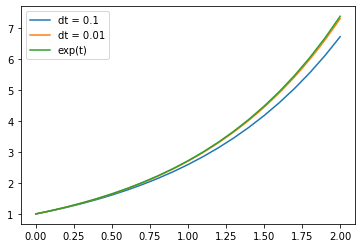

In [5]:
simulation1()

L'ordre de convergence est lié à l'écart entre la solution réelle et la solution numérique. On peut l'observer graphiquement en relevant l'erreur et en l'exprimant en fonction de dt. Dans le cas qui nous occupe, le schéma d'Euler étant convergent d'ordre 1, on s'attend à ce que l'erreur soit de l'ordre de $dt^2$ quand dt tend vers 0.

# Question 7 :

In [6]:
x0 = np.array([[2, 0.1]])

def F(t, x):
    x1 = x[0][0]
    x2 = x[0][1]
    return np.array([[alpha*x1 - beta*x1*x2, -gamma*x2 + delta*x1*x2]])

# SIMULATION 2 : application au système de Lotka et Volterra

def simulation2():
    V = solve_euler_explicit(F, x0, 0, 300, 0.1)
    t = V[0]
    y1 = [y[0] for y in V[1]]
    y2 = [y[1] for y in V[1]]
    plt.plot(t, y1, label="sardines")
    plt.plot(t, y2, label="requins")
    plt.legend()
    plt.show()

# SIMULATION 3 : évolution de H

def simulation3():
    V = solve_euler_explicit(F, x0, 0, 300, 0.1)
    t = V[0]
    y = [H(x1, x2) for (x1, x2) in V[1]]
    plt.plot(t, y, label="H(t)")
    plt.legend()
    plt.show()

<ipython-input-6-f22375b90129>:6: RuntimeWarning: overflow encountered in double_scalars
  return np.array([[alpha*x1 - beta*x1*x2, -gamma*x2 + delta*x1*x2]])
<ipython-input-6-f22375b90129>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([[alpha*x1 - beta*x1*x2, -gamma*x2 + delta*x1*x2]])


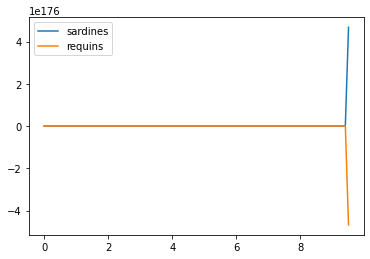

In [7]:
simulation2()

En temps long, les solutions numériques présentent une alterance de pics de hauteur divergeant vers $+\infty$ et d'abaissement à des valeurs trsè faibles, ce qui n'est pas réaliste. On s'attend plutôt à observer des oscillations presque périodiques et d'amplitude moins importante.

<ipython-input-6-f22375b90129>:6: RuntimeWarning: overflow encountered in double_scalars
  return np.array([[alpha*x1 - beta*x1*x2, -gamma*x2 + delta*x1*x2]])
<ipython-input-6-f22375b90129>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([[alpha*x1 - beta*x1*x2, -gamma*x2 + delta*x1*x2]])
<ipython-input-2-f3254c08f968>:10: RuntimeWarning: invalid value encountered in log
  return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)
<ipython-input-2-f3254c08f968>:10: RuntimeWarning: invalid value encountered in double_scalars
  return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)


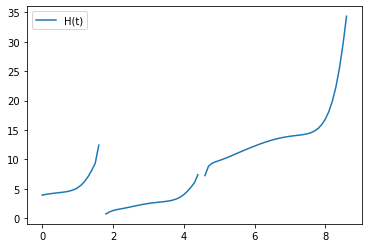

In [8]:
simulation3()

De même H n'est pas conservée mais croît vers $+\infty$

# Question 8 :

In [9]:
def fonction_point_fixe(x0, t0, dt, f): #retourne la fonction g_n dont on recherche un point fixe à l'itération n du schéma d'Euler implicite
    def g(x):
        return x0 + dt*f(t0+dt, x)
    return g

def cherche_point_fixe(f, x0, itermax): #retourne le point fixe de la foonction prise en argumnt à condition qu'elle soit assez contractante
    x = x0
    x_ = f(x0)
    k = 0
    while linalg.norm(x - x_)/linalg.norm(x0) >= 10E-3:
        x_, x = f(x_), f(x)
        k += 1
        if k == itermax :
            raise Exception("pas de point fixe trouvé")
    return x_

def solve_euler_implicit(f, x0, t0, tf, dt, itermax = 100):
    x = x0
    t = np.array([[t0]])
    X, T = x0, t0
    while T < tf :
        X_, T_ = X, T
        g = fonction_point_fixe(X_, T_, dt, f)
        X = cherche_point_fixe(g, X_ + dt*f(T_, X_), itermax)
        T += dt
        x = np.append(x, X, axis = 0)
        t = np.append(t, np.array([[T]]), axis = 0)
    return t, x

On vérifie la convergence du schéma sur l'équation différentielle $\dot x = x$ avec la condition initiale $x(0) = 1$, dont la solution est exp.

In [10]:
# SIMULATION 4 : convergence du schéma vers exp

def simulation4():
    t, y1 = solve_euler_implicit(g, x1, 0, 2, 0.1)
    t2, y2 = solve_euler_implicit(g, x1, 0, 2, 0.01)
    y3 = np.exp(t)
    plt.plot(t, y1, label="dt = 0.1")
    plt.plot(t2, y2, label="dt = 0.01")
    plt.plot(t, y3, label="exp(t)")
    plt.legend()
    plt.show()

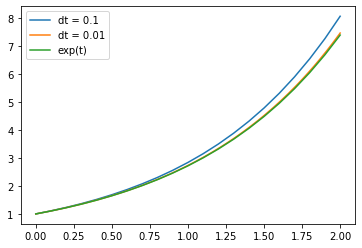

In [11]:
simulation4()

On applique ce nouveau schéma aux équations de Lotka et Volterra :

In [12]:
# SIMULATION 5 : application au système de Lotka et Volterra

def simulation5():
    V = solve_euler_implicit(F, x0, 0, 50, 0.1)
    t = V[0]
    y1 = [y[0] for y in V[1]]
    y2 = [y[1] for y in V[1]]
    plt.plot(t, y1, label="sardines")
    plt.plot(t, y2, label="requins")
    plt.legend()
    plt.show()

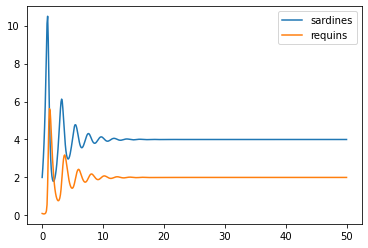

In [13]:
simulation5()

Cette fois-ci, après un régime transitoire assez long et composé d'oscillations à l'allure réaliste (l'augmentation du nombre de requins est suivi par un abaissemnt de la population de sardines qui induit une baisse du nombre de requins...), la solution numérique se stabilisent en $\bar x$.

# Question 9 :

Soit $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ une fonction continûment différentiable.
Soit $F : (\mathbb{R}_{+}^{*})^2 \rightarrow \mathbb{R}^2$ définie par :
$$ 
F(x_1, x_2) = 
\begin{bmatrix}
(x_1(\alpha \hspace{1mm} \textrm{-} \hspace{1mm} \beta x_2) \hspace{1mm} \textrm{-} \hspace{1mm} u_1(x_1, x_2)(H(x_1, x_2) \hspace{1mm} \textrm{-} \hspace{1mm} H_0) \\
\hspace{1mm} \textrm{-} \hspace{1mm}  x_2(\gamma \hspace{1mm} \textrm{-} \hspace{1mm} \delta x_1) \hspace{1mm} \textrm{-} \hspace{1mm} u_2(x_1, x_2)(H(x_1, x_2) \hspace{1mm} \textrm{-} \hspace{1mm} H_0))
\end{bmatrix}
$$

F est continûment différentiable sur $(\mathbb{R}_{+}^{*})^2$ puisqu'elle est obtenue par produits et sommes de telles fonctions. Alors, par théorème de Cauchy-Lipschitz, pour tout $(x_0, t_0) \in (\mathbb{R}_{+}^{*})^2 \times \mathbb{R}_{+}$, il existe une unique solution maximale à l'équation différentielle $\dot x = F(t, x)$ initialisée en $x(t_0) = x_0$. 
H étant conservée le long des solutions du système de Lotka et Volterra, la solution $x$ du système de Lotka et Volterra initialisée en $x(t_0) = x_0$ et défiinie sur $\mathbb{R}_+$ est une solution globale de l'équation différentielle précédente, donc il s'agit de sa solution maximale. 
Les solutions maximale des deux équations sont donc identiques.

# Question 10

Soient $(x_0, t_0) \in (\mathbb{R}_{+}^{*})^2$ avec $x_0 \ne \bar x$, $x = (x_1, x_2)$ la solution maximale du nouveau système différentiel étudié. Alors pour tout t positif :

$
\begin{align*} \dfrac{d}{dt}(H(x(t)) - H(x_0)) &= \dfrac{dx_1}{dt}(t)\partial_1 H(x(t)) + \dfrac{dx_2}{dt}(t)\partial_2 H(x(t)) \newline 
&= x_1(t)(\alpha \hspace{1mm} \textrm{-} \hspace{1mm} \beta x_2(t))  \hspace{1mm} \textrm{-} \hspace{1mm} u_1(x(t))(H(x(t)) \hspace{1mm} \textrm{-} \hspace{1mm} H_0)(\delta \hspace{1mm} \textrm{-} \hspace{1mm} \dfrac{\gamma}{x_1(t)}) \newline 
&\textrm{-}  x_2(t)(\gamma \hspace{1mm} \textrm{-} \hspace{1mm} \delta x_1(t)) + u_2(x(t)).(H(x(t)) \hspace{1mm} \textrm{-} \hspace{1mm} H_0)(\beta  \hspace{1mm} \textrm{-} \hspace{1mm} \dfrac{\alpha}{x_2(t)}) \newline
&= \hspace{1mm} \textrm{-} \hspace{1mm} (u_1(x(t)) + u_2(x(t)))(H(x(t)) \hspace{1mm} \textrm{-} \hspace{1mm} H_0) \end{align*}
$

Alors en définissant u sur $(\mathbb{R}_{+}^{*})^2$ par $u(x_1, x_2) = (-k(\delta - \dfrac{\gamma}{x_1})^2, -k(\beta - \dfrac{\alpha}{x_2})^2)$, on obtient, pour tout t positif l'équation différentielle (1):

$$\dfrac{d}{dt}(H(x(t)) - H(x_0)) = -k.||\nabla H(t)||^2.(H(x(t)) - H(x_0))$$

On suppose par ailleurs que x reste à une distance strictement positive de $\bar x$ quand t tend vers $+\infty$, c'est-à-dire qu'il existe un réel $ c > 0$ tel que pour tout $t \in \mathbb{R}_{+}$, on ait $||x(t) - \bar x|| > c$. 
D'autre part il existe $c' > 0$ tel que pour tout $x \in \mathbb{R}_{+}^{*})^2$, $||x(t) - \bar x|| > c \implies ||\nabla H(x)||^2 > c'$. En effet, si l'on suppose par l'absudre que pour tout $c' > 0$, il existe $x \in \mathbb{R}_{+}^{*})^2$ tel que $||x(t) - \bar x|| > c$ et $||\nabla H(x)||^2 \le c'$, alors pour tout $k \in \mathbb{N}$, il existe $x_k = (x_{k1}, x_{k2}) \in \mathbb{R}_{+}^{*})^2$ tel que $||x(t) - \bar x|| > c$ et $||\nabla H(x)||^2 \le \dfrac{1}{k}$. Alors pour tout $k \in \mathbb{N}$, on aurait :
$$ (\delta - \dfrac{\gamma}{x_{k1}})^2 \le \dfrac{1}{k} \hspace{1cm} \mbox{et} \hspace{1cm} (\beta - \dfrac{\alpha}{x_{k2}})^2 \le \dfrac{1}{k} $$
Soit pour tout $k$ assez grand :
$$ \dfrac{\gamma}{\delta + \dfrac{1}{\sqrt k}} \le x_{k1} \le \dfrac{\gamma}{\delta - \dfrac{1}{\sqrt k}} \hspace{1cm} \mbox{et} \hspace{1cm} \dfrac{\alpha}{\beta + \dfrac{1}{\sqrt k}} \le x_{k2} \le \dfrac{\alpha}{\beta - \dfrac{1}{\sqrt k}}$$
Alors la suite $(x_k)_{k \in \mathbb{N}}$ converge vers $\bar x$ ce qui contredit la distance minimale $c > 0$ exigée entre $x_k$ et $\bar x$ pour tout $k \in \mathbb{N}$.
Mais alors, en résolvant l'équation différentielle (1), on obtient, pour tout $t \in \mathbb{R}_{+}$ :
$$ |H(x(t))- H(x_0)| = Ae^{-k\int_0^t ||\nabla H(s)||^2 \, \mathrm ds} \le Ae^{-k\int_0^t c' \, \mathrm ds} = Ae^{-kc't}$$
où A est une constante réelle positive.

$H(x(t))$ converge explonentiellement vers $H(x_0)$

# Question 11

Pour stabiliser H, il faudrait alors appliquer le schéma d'Euler à la fonction F précédente et non plus à la fonction que nous utilisions jusqu'ici dans nos simulations. #malheureusement ça ne fonctionne pas
$k$ a pour rôle d'accélérer la convergence de H. En effet, c' peut être très faible pour une trajectoire passant très près d' $\bar x$. Mais il ne peut pas être arbitrairement grand : au premier ordre en dt on a pour $j \in \mathbb{N}^{*}$:

$$(H(x^{j+1}) - H(x_0)) = (1 - kdt||\nabla H(x(t^j))||^2).(H(x^{j}) - H(x_0))$$

Un k trop grand pourrait alors entrainer la divergence de H, par exemple si il existe $\epsilon > 0$ tel que pour tout $ j \in \mathbb{N}$, $|1 - kdt.||\nabla H(x(t^j))||^2| > 1 + \epsilon$. La suite $(H(x^{j+1}) - H(x_0))_{j \in \mathbb{N}}$ serait alors divergente (à moins d'être initialisée à 0) car elle dominerait une suite géométrique de raison de module strictement supérieur à 1